In [46]:
from library import encrypt
from library import sign_up as key_gen

import time
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

import sys
sys.setrecursionlimit(1500)

%matplotlib inline

In [47]:
p, q, e, _, n, _, d, _= key_gen(400,e='65537')
print("p:", p)
print("q:", q)
print("n:", n)
print("e:", e)
print("d:", d)

p: 2080867111207753887606505728527359175488257896580989323195067028396591520384723283783367047622251695481339041739006756507
q: 2057973449754885393196220018437098237366087210059388073373588772238510564956753975347042649167335383948469388588298643667
n: 4282369267333704011053866729995158775545182736086699808771914754228289873441156750057500086335764491571331723148098181832827466656895878966653596601663490701647319716925690780001624620341382800438165800077824841551652217090483576817026591169
e: 65537
d: 3130506877469069769223182342300350363574685440334127304247275034870731640854668030860502794394924104348550155245162820898586193869570861957511472477803011822829586654930178050366817266327543262272720010196525812448018351163240392345942788645


In [48]:
n_arr=[]
e_arr=[]
d_arr=[]
time_arr=[]
MAXNUMOFBITS=1024-4+1

In [49]:
for i in tqdm(range(MAXNUMOFBITS)):
	p, q, e, _, n, phi_n, d, _=key_gen(i+4, e='65537')
	n_arr.append(n)
	e_arr.append(e%phi_n)
	d_arr.append(d)

n_arr=np.array(n_arr)
e_arr=np.array(e_arr)
d_arr=np.array(d_arr)
n_arr=np.save("n_arr_e.npy",n_arr)
e_arr=np.save("e_arr_e.npy",e_arr)
d_arr=np.save("d_arr_e.npy",d_arr)

  0%|          | 0/1021 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [51]:
n_arr=np.load("n_arr_e.npy", allow_pickle=True)
e_arr=np.load("e_arr_e.npy", allow_pickle=True)
d_arr=np.load("d_arr_e.npy", allow_pickle=True)

In [ ]:
len(n_arr)

1021

In [54]:
time_arr=[]
lenght_of_string=30
bit_start=0
loop_size=160

for i in tqdm(range(bit_start, len(n_arr))):
	start = time.time()
	for _ in range(loop_size): encrypt(n_arr[i], e_arr[i], lenght_of_string*"a")
	end = time.time()
	time_arr.append((end-start))

  0%|          | 0/1021 [00:00<?, ?it/s]

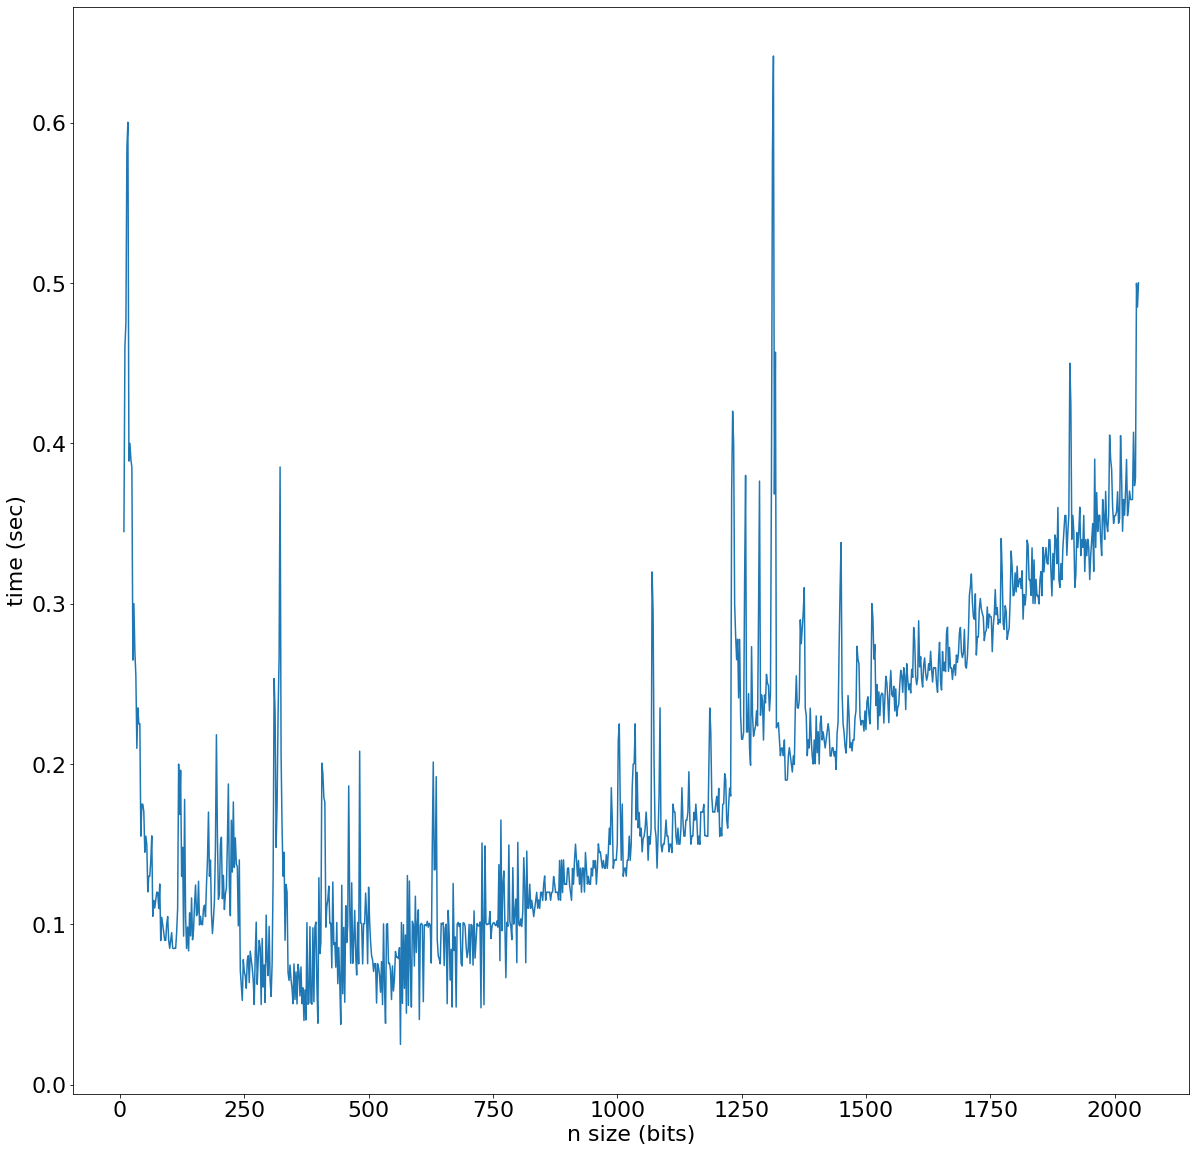

In [55]:
def show_img(imgs, size=10):
    if type(imgs) is not list:
        imgs = [imgs]
    fig = plt.figure(figsize=(size, size))
    for i in range(len(imgs)):
        a = fig.add_subplot(1, len(imgs), i+1)
        plt.imshow(imgs[i], cmap='gray')
        plt.axis("off")
    plt.show()

rand_num= np.random.randint(0, 100)

fig = plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 22})
plt.plot(2*(np.array(range(bit_start, len(n_arr)))+4), np.array(time_arr)*5)
plt.xlabel('n size (bits)')
plt.ylabel('time (sec)')
plt.savefig('RSAEncryption'+str(rand_num)+'.jpg')